# Ensembles - RE

In [1]:
import os, sys
path = os.getcwd()+"/../.."
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!
print(os.getcwd())

import numpy as np
import matplotlib.pyplot as plt

params ={"figure.facecolor": "w",
         "font.size": 14}
plt.rcParams.update(params)

%matplotlib inline

#Ensembler
from ensembler.potentials.OneD import harmonicOscillator, envelopedPotential
#from ensembler.integrator.newtonian import positionVerletIntegrator
from ensembler.integrator.stochastic import metropolisMonteCarloIntegrator
from ensembler.system.basic_system import system as basic_system
from ensembler.system.eds_system import edsSystem

c:\Users\benja\OneDrive - ETH Zürich\PhD\Code\ensembler_public\examples\dev


# Simulated Tempering

Sugita, Okinamura?

## Basic Definitions

In [2]:
#Potential:
potential = harmonicOscillator()
#Integrator
integrator = metropolisMonteCarloIntegrator() #metropolisMonteCarloIntegrator()
#System
system = basic_system(integrator=integrator, potential=potential, position=5)

#Ensemble
from ensembler.ensemble import replica_exchange

trials = 100
steps_between_trials = 100
temperature_range = np.linspace(298, 550, 4)

simulated_tempering = replica_exchange.TemperatureReplicaExchange(system=system, temperature_Range=temperature_range, steps_between_trials=steps_between_trials)
simulated_tempering.replicas

{0: <ensembler.system.basic_system.system at 0x1fc7e283bc8>,
 1: <ensembler.system.basic_system.system at 0x1fc7fc6de88>,
 2: <ensembler.system.basic_system.system at 0x1fc7fc84e88>,
 3: <ensembler.system.basic_system.system at 0x1fc7fc70cc8>}

# Simulate

In [3]:
simulated_tempering.simulate(trials, reset_ensemble=True)
#ensemble.exchange_information

In [4]:
reps = simulated_tempering.replicas

for repID, replica in reps.items():
    print(repID)
    replica.simulate(1000, withdrawTraj=True)
print(vars(replica))

0



1



2



3



{'temperature': 550.0, 'mass': 1, 'nparticles': 1, 'nDim': 1, 'nStates': 1, 'currentState': State(position=-2.1819330802050114, temperature=550.0, totEnergy=2.3804159832464644, totPotEnergy=2.3804159832464644, totKinEnergy=nan, dhdpos=-0.5638742459186429, velocity=None), 'trajectory':       position  temperature  totEnergy  totPotEnergy  totKinEnergy    dhdpos  \
0    -1.012494        550.0   0.512573      0.512573           NaN  0.653848   
1    -0.365244        550.0   0.066702      0.066702           NaN  0.647251   
2    -1.115621        550.0   0.622305      0.622305           NaN -0.750377   
3    -0.944349        550.0   0.445898      0.445898           NaN  0.171272   
4    -1.322656        550.0   0.874710      0.874710           NaN -0.378307   
...        ...          ...        ...           ...           ...       ...   
996  -0.340945        550.0   0.058122      0.058122           NaN  0.706544   
997  -0.960009        550.0   0.460808      0.460808           NaN -0.619

,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity
0,-1.012494,550.0,0.512573,0.512573,NaN,0.653848,NaN
1,-0.365244,550.0,0.066702,0.066702,NaN,0.647251,NaN
2,-1.115621,550.0,0.622305,0.622305,NaN,-0.750377,NaN
3,-0.944349,550.0,0.445898,0.445898,NaN,0.171272,NaN
4,-1.322656,550.0,0.874710,0.874710,NaN,-0.378307,NaN


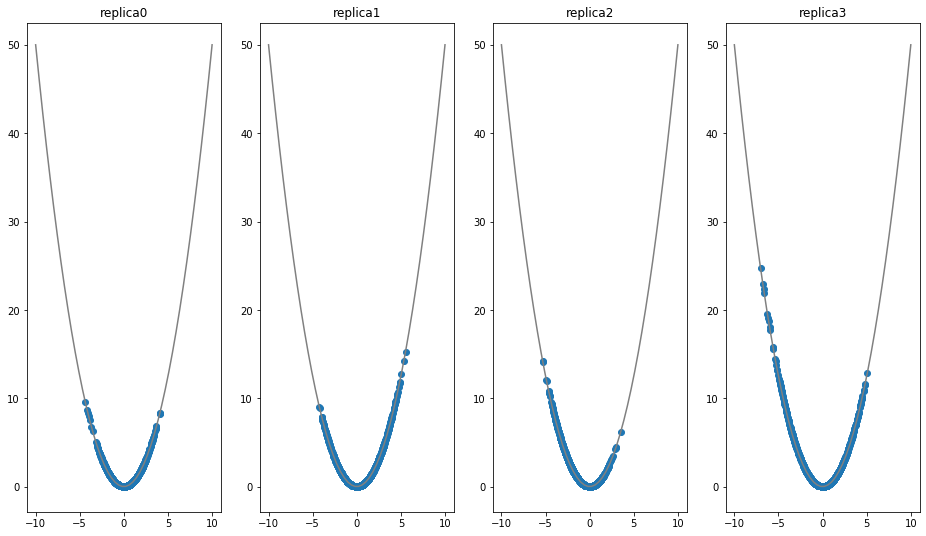

In [5]:
trajs = simulated_tempering.get_trajectories()

positions = np.linspace(-10,10)
fig, axes = plt.subplots(ncols=len(trajs), figsize=[16,9])

for traj, ax in zip(trajs, axes):
    ax.plot(positions, simulated_tempering.replicas[traj].potential.ene(positions), c="grey")
    ax.scatter(trajs[traj].position, trajs[traj].totPotEnergy)
    min_e = min(trajs[traj].totEnergy)
    #ax.set_ylim([min_e,min_e+10])
    ax.set_title("replica"+str(traj))

trajs[3].head()


In [6]:
simulated_tempering.replicas[0]

In [7]:
simulated_tempering.exchange_information

,nExchange,replicaID,replicaPositionI,exchangeCoordinateI,TotEI,replicaPositionJ,exchangeCoordinateJ,TotEJ,doExchange
0,0,0,0,{'temperature': 298.0},17.292265,0,{'temperature': 298.0},17.292265,False
1,0,1,1,{'temperature': 382.0},0.000766,1,{'temperature': 382.0},0.000766,False
2,0,2,2,{'temperature': 466.0},18.212712,2,{'temperature': 466.0},18.212712,False
3,0,3,3,{'temperature': 550.0},1.845823,3,{'temperature': 550.0},1.845823,False
4,1,1,0,{'temperature': 298.0},0.084074,1,{'temperature': 382.0},0.496321,True
...,...,...,...,...,...,...,...,...,...
399,99,0,3,{'temperature': 550.0},2.726386,2,{'temperature': 466.0},0.524821,True
400,99,0,3,{'temperature': 550.0},2.726386,3,{'temperature': 550.0},2.726386,False
401,100,3,0,{'temperature': 298.0},1.846865,0,{'temperature': 298.0},1.846865,False
402,100,2,1,{'temperature': 382.0},4.739713,2,{'temperature': 466.0},2.264844,True


# Visualisation

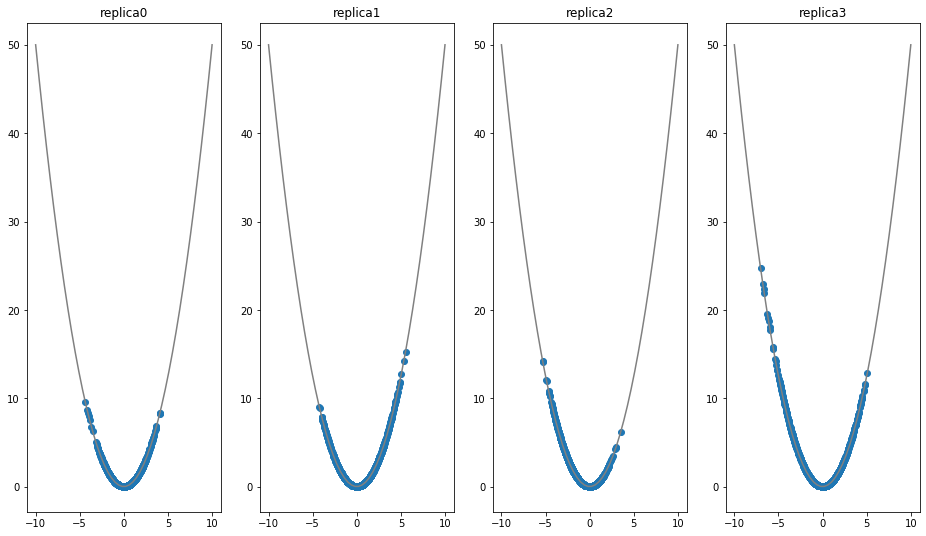

In [8]:
trajs = simulated_tempering.get_trajectories()

positions = np.linspace(-10,10)
fig, axes = plt.subplots(ncols=len(trajs), figsize=[16,9])

for traj, ax in zip(trajs, axes):
    ax.plot(positions, simulated_tempering.replicas[traj].potential.ene(positions), c="grey")
    ax.scatter(trajs[traj].position, trajs[traj].totPotEnergy)
    min_e = min(trajs[traj].totEnergy)
    #ax.set_ylim([min_e,min_e+5])
    ax.set_title("replica"+str(traj))


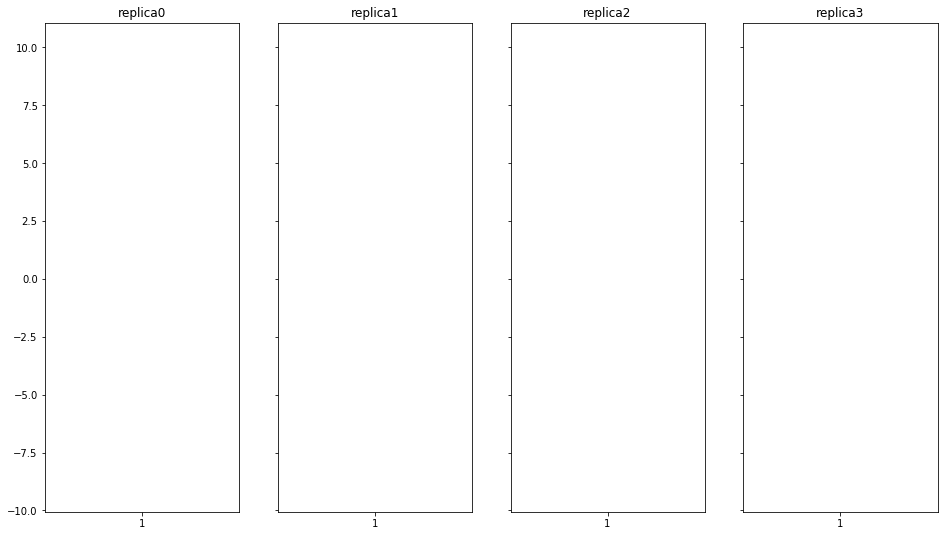

In [9]:
trajs = simulated_tempering.get_trajectories()

positions = np.linspace(-10,10)
fig, axes = plt.subplots(ncols=len(trajs), figsize=[16,9], sharey=True)

for traj, ax in zip(trajs, axes):
    ax.boxplot(trajs[traj].totKinEnergy)
    min_e = min(trajs[traj].totEnergy)
    ax.set_title("replica"+str(traj))


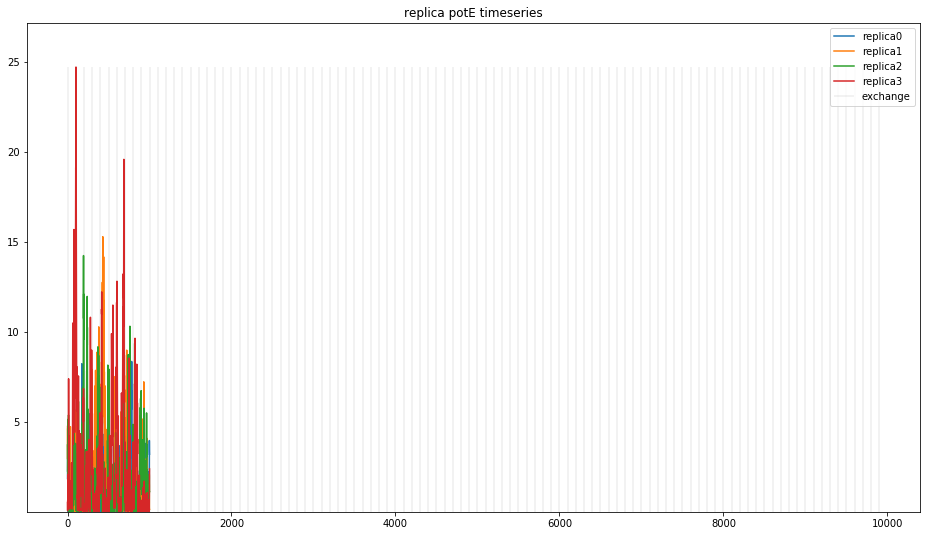

In [10]:

fig, ax = plt.subplots(ncols=1, figsize=[16,9])
enes = [trajs[x].totEnergy for x in sorted(trajs)] 
min_e = np.min(enes)
max_e = np.max(enes)

for ind, ene in enumerate(enes):
    ax.plot(ene, label="replica"+str(ind))
ax.vlines([steps_between_trials*x for x in range(trials)], ymin=min_e, ymax=max_e, label="exchange", lw=0.1)
ax.set_title("replica potE timeseries")
ax.set_ylim(1.1*min_e, 1.1*max_e)
ax.legend()

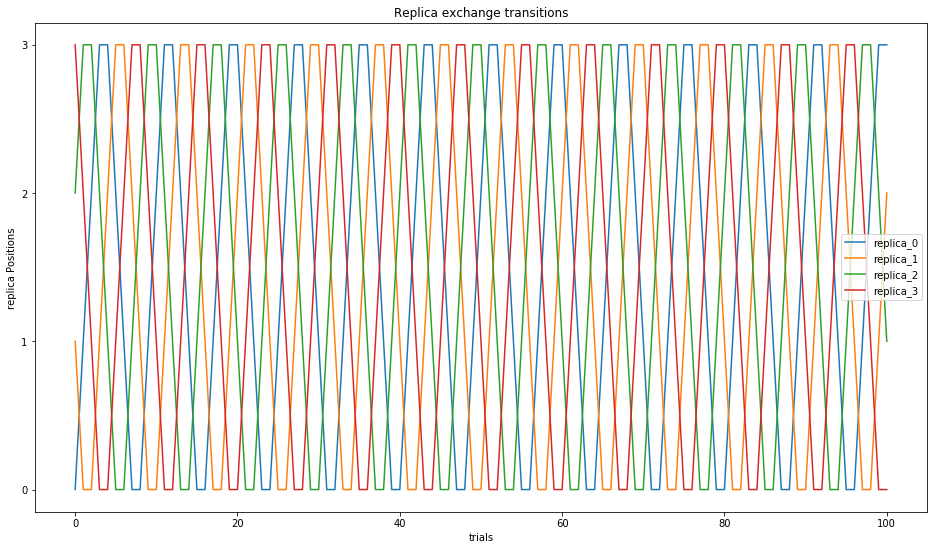

In [11]:
stats= simulated_tempering.exchange_information
replicas = np.unique(simulated_tempering.exchange_information.replicaID)
trials = np.unique(simulated_tempering.exchange_information.nExchange)

import itertools as it

fig, ax = plt.subplots(ncols=1, figsize=[16,9])

replica_positions = {}
for replica in replicas:
    replica_positions.update({replica: stats.loc[stats.replicaID==replica].replicaPositionI})

    x = trials
    y = replica_positions[replica]

    ax.plot(x,y , label="replica_"+str(replica))

#plt.yticks(replicas+1, reversed(replicas+1))
ax.set_yticks(ticks=replicas)
ax.set_yticklabels(labels=replicas)

ax.set_ylabel("replica Positions")
ax.set_xlabel("trials")
ax.set_title("Replica exchange transitions")
if(len(replicas)<10): plt.legend()

# Hamiltonian Replica Exchange

## RE-EDS

Replica Exchange - Enveloping Distribution Sampling (RE-EDS) is a combined Method, that efficiently can calculate free energy differences between mutliple end-states

In [1]:
import os, sys
path = os.getcwd()+"/../.."
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!
print(os.getcwd())

import numpy as np
import matplotlib.pyplot as plt

params ={"figure.facecolor": "w",
         "font.size": 14}
plt.rcParams.update(params)

%matplotlib inline

#Ensembler
from ensembler.potentials.OneD import harmonicOscillator, envelopedPotential
from ensembler.integrator.newtonian import positionVerletIntegrator
from ensembler.integrator.stochastic import metropolisMonteCarloIntegrator
from ensembler.system.basic_system import system as systems
from ensembler.system.eds_system import edsSystem

c:\Users\benja\OneDrive - ETH Zürich\PhD\Code\ensembler_public\examples\dev


[1.0, 0.6812920690579612, 0.4641588833612779, 0.31622776601683794]

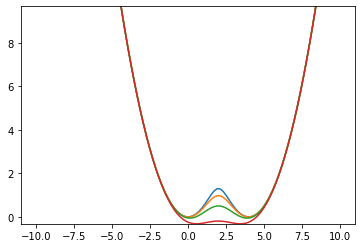

In [2]:
#BUILD
##Ensemble Settings:
s_values = np.logspace(start=0, stop=-0.5, num=4)
trials=20
steps_between_trials=10#0

##Potential:
pot_diff= 0
space_shift=4
k1 = k2 = 1
potentialA = harmonicOscillator(k=k1)
potentialB = harmonicOscillator(k=k2, x_shift=space_shift, y_shift=pot_diff)
potential = envelopedPotential(V_is=[potentialA, potentialB])


###plot Potential
pos = np.linspace(-10,10,100)
for s in s_values:
    potential.s=s
    ene = potential.ene(pos)
    plt.plot(pos, ene)
plt.ylim([min(ene), min(ene)+10])


##Integrator
integrator = metropolisMonteCarloIntegrator(randomnessIncreaseFactor=1)

##System
eds_system = edsSystem(integrator=integrator, potential=potential, position=5)


##Ensemble
from ensembler.ensemble import replica_exchange
ensemble = replica_exchange.ReplicaExchangeEnvelopingDistributionSampling(system=eds_system, exchange_criterium=None, s_range=s_values, steps_between_trials=steps_between_trials)

[replica.s for repID, replica in ensemble.replicas.items()]

In [3]:
reps = ensemble.replicas

for repID, replica in reps.items():
    print(repID)
    replica.simulate(1000, withdrawTraj=True)
    

0



1



2



3


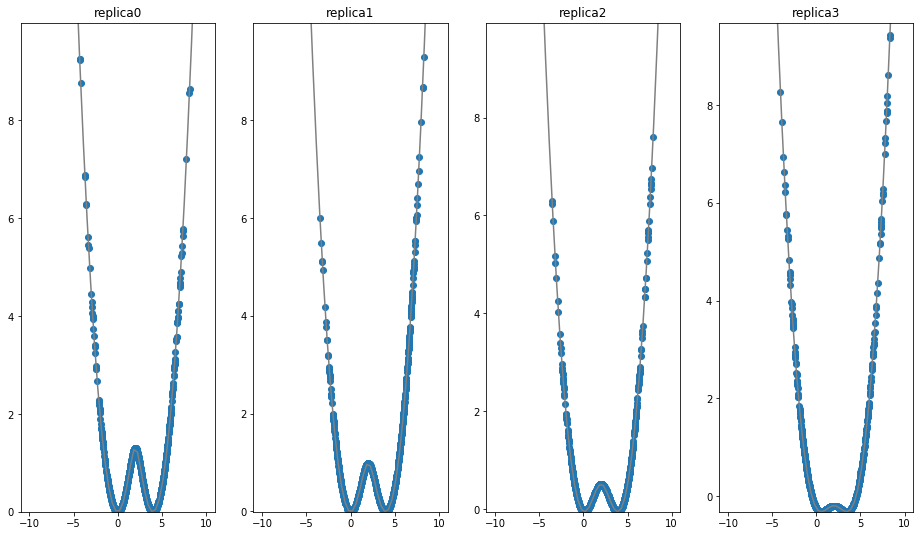

In [4]:
trajs = ensemble.get_trajectories()

positions = np.linspace(-10,10)
fig, axes = plt.subplots(ncols=len(trajs), figsize=[16,9])

for traj, ax in zip(trajs, axes):
    ax.plot(positions, ensemble.replicas[traj].potential.ene(positions), c="grey")
    ax.scatter(trajs[traj].position, trajs[traj].totEnergy)
    min_e = min(trajs[traj].totEnergy)
    ax.set_ylim([min_e,min_e+10])
    ax.set_title("replica"+str(traj))


In [5]:
ensemble.simulate(trials, reset_ensemble=True)

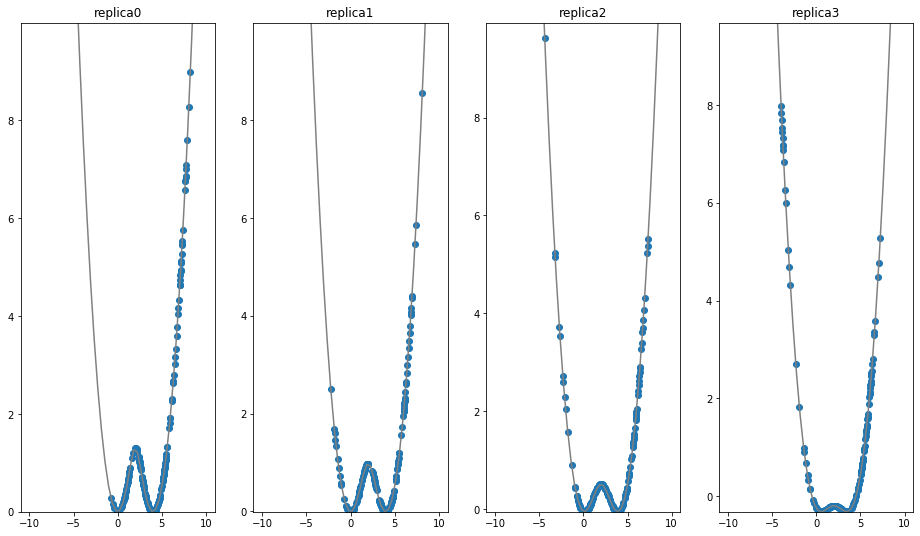

In [6]:
trajs = ensemble.get_trajectories()
equilib = 10
positions = np.linspace(-10,10)
fig, axes = plt.subplots(ncols=len(trajs), figsize=[16,9])

for traj, ax in zip(trajs, axes):
    ax.plot(positions, ensemble.replicas[traj].potential.ene(positions), c="grey")
    ax.scatter(trajs[traj].position[equilib:], trajs[traj].totEnergy[equilib:])
    min_e = min(trajs[traj].totEnergy)
    ax.set_ylim([min_e,min_e+10])
    ax.set_title("replica"+str(traj))


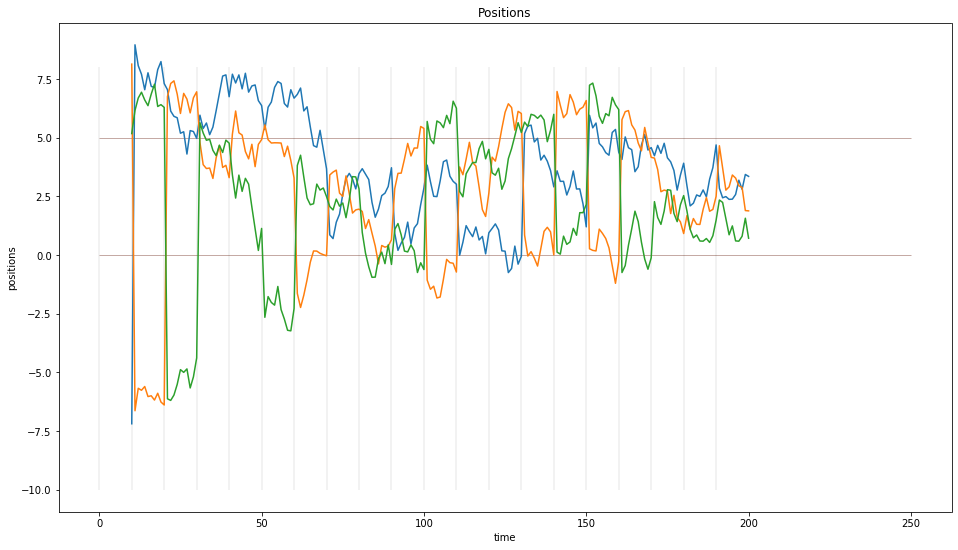

In [7]:
plt.figure(figsize=[16,9])
plt.plot(trajs[0].position[equilib:])
plt.plot(trajs[1].position[equilib:])
plt.plot(trajs[2].position[equilib:])

plt.vlines([steps_between_trials*x for x in range(20)], ymin=8, ymax=-10, label="exchange", lw=0.1)
plt.hlines(5, xmin=0,xmax=250, lw=0.5, color="C5", zorder=-1)
plt.hlines(0, xmin=0,xmax=250, lw=0.5, color="C5", zorder=-1)

plt.title("Positions")
plt.ylabel("positions")
plt.xlabel("time")

pass

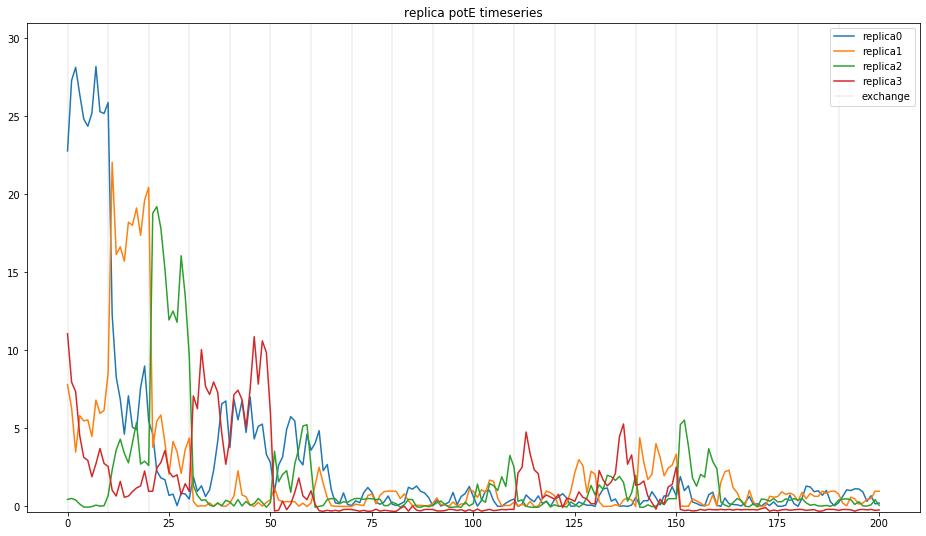

In [8]:
trials=20

fig, ax = plt.subplots(ncols=1, figsize=[16,9])
enes = [trajs[x].totEnergy for x in sorted(trajs)] 
min_e = np.min(enes)
max_e = np.max(enes)

ax.vlines([steps_between_trials*x for x in range(trials)], ymin=1.1*min_e, ymax=1.1*max_e, label="exchange", lw=0.1)

for ind, ene in enumerate(enes):
    ax.plot(ene, label="replica"+str(ind))
ax.set_title("replica potE timeseries")
ax.set_ylim(1.1*min_e, 1.1*max_e)
ax.legend()

[0 1 2 3]


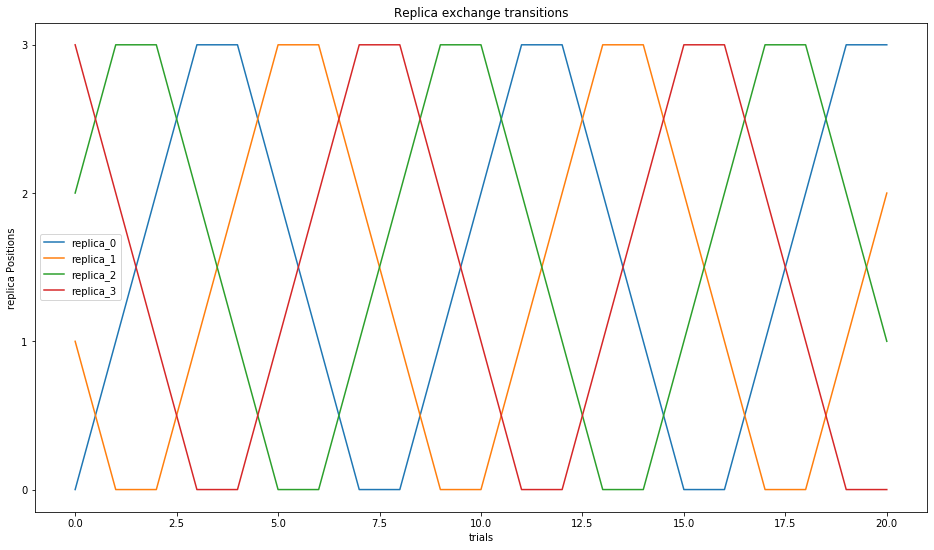

In [9]:
stats= ensemble.exchange_information
replicas = np.unique(ensemble.exchange_information.replicaID)
trials = np.unique(ensemble.exchange_information.nExchange)

import itertools as it

fig, ax = plt.subplots(ncols=1, figsize=[16,9])

replica_positions = {}
for replica in replicas:
    replica_positions.update({replica: stats.loc[stats.replicaID==replica].replicaPositionI})

    x = trials
    y = replica_positions[replica]

    ax.plot(x,y , label="replica_"+str(replica))

#plt.yticks(replicas+1, reversed(replicas+1))
print(replicas)
ax.set_yticks(ticks=replicas)
ax.set_yticklabels(labels=replicas)

ax.set_ylabel("replica Positions")
ax.set_xlabel("trials")
ax.set_title("Replica exchange transitions")
if(len(replicas)<10): plt.legend()